In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report,roc_curve
                            ,roc_auc_score)

# Load datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
datasets



Model Performance Comparison:

Logistic Regression:
Accuracy: 0.933
ROC AUC: 0.997
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:


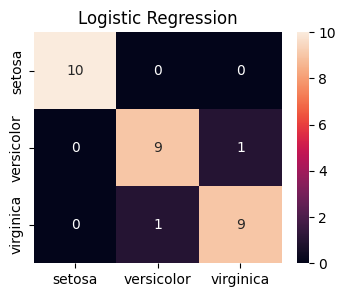

k-NN:
Accuracy: 0.933
ROC AUC: 0.993
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:


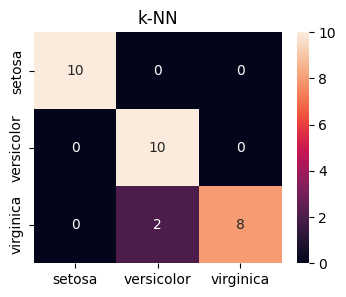

SVM:
Accuracy: 0.967
ROC AUC: 0.997
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:


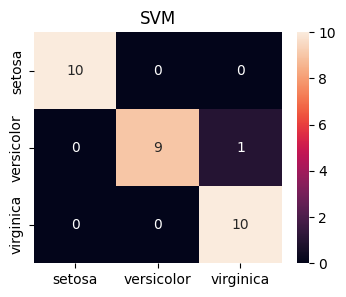

Naive Bayes:
Accuracy: 0.967
ROC AUC: 0.990
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:


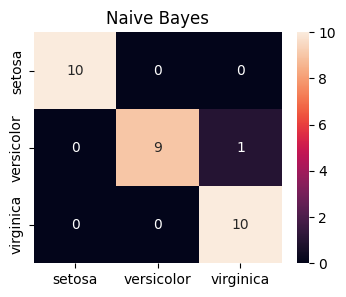

ValueError: multiclass format is not supported

<Figure size 800x600 with 0 Axes>

In [22]:
 #Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():

    model.fit(X_train_scaled, y_train)


    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    # Store results
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "cm": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred,
                                       target_names=target_names),
        "roc_auc": roc_auc_score(y_test, y_proba, multi_class='ovr'),
        "y_proba": y_proba
    }

# Print metrics
print("Model Performance Comparison:\n")
for name, result in results.items():
    print(f"{name}:")
    print(f"Accuracy: {result['accuracy']:.3f}")
    print(f"ROC AUC: {result['roc_auc']:.3f}")
    print(result['report'])
    print("Confusion Matrix:")
    plt.figure(figsize=(4,3))
    sns.heatmap(result['cm'], annot=True, fmt='d',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title(name)
    plt.show()

# Plot ROC Curves
plt.figure(figsize=(8,6))
for name, result in results.items():
     fpr, tpr, _ = roc_curve(y_test,y_proba)

     plt.plot(fpr, tpr, label=f'Model Performance {name}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.show()

# PCA + Best Model (SVM shows best performance typically)
best_model = SVC(kernel='rbf', probability=True)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

best_model.fit(X_train_pca, y_train)
y_pred_pca = best_model.predict(X_test_pca)

print("\nPCA + Best Model (SVM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.3f}")
print(classification_report(y_test, y_pred_pca, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))

# Visualize PCA components
plt.figure(figsize=(8,6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], target_names):
    plt.scatter(X_test_pca[y_pred_pca == i, 0],
                X_test_pca[y_pred_pca == i, 1],
                color=color, label=target_name)
plt.title('PCA: Iris Dataset Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()